<a href="https://colab.research.google.com/github/mas1996oud/Gote_Robot/blob/erosion/Gote_Robot_using_Bard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

•وارد کردن عکس به صورت grayscale

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

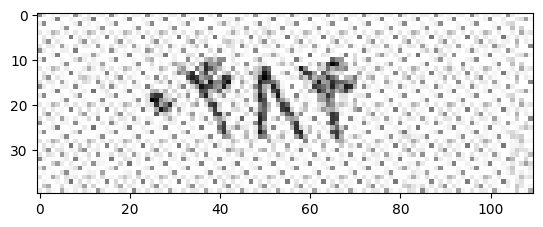

In [2]:
# Load the image
img = cv2.imread('/content/drive/MyDrive/0484.jpg',0)

plt.imshow(img, 'gray')

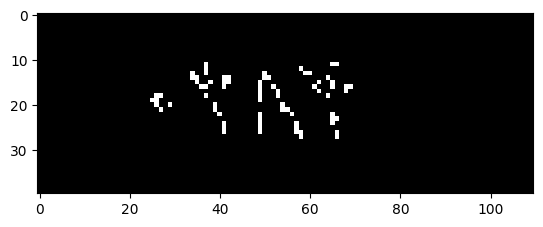

In [3]:
# Threshold the image to identify the checkerboard pattern
thresh = cv2.threshold(img, 180, 255,cv2.THRESH_BINARY_INV)[1]

plt.imshow(thresh, 'gray')

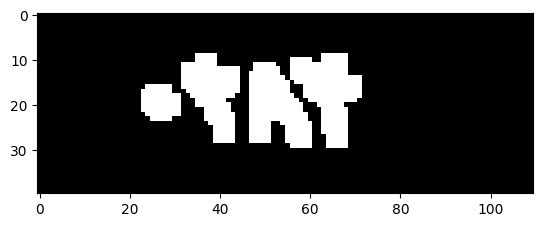

In [4]:
# Create a mask of the checkerboard pattern
mask = cv2.dilate(thresh, None, iterations=2)

plt.imshow(mask, 'gray')

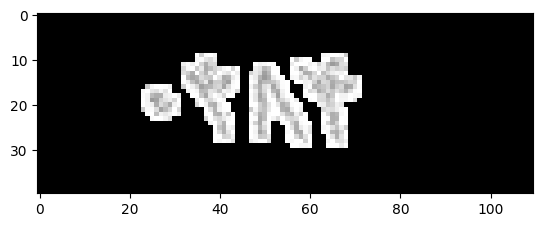

In [16]:
# Apply the mask to the image
result = cv2.bitwise_and(img,img, mask=mask)

plt.imshow(result, 'gray')

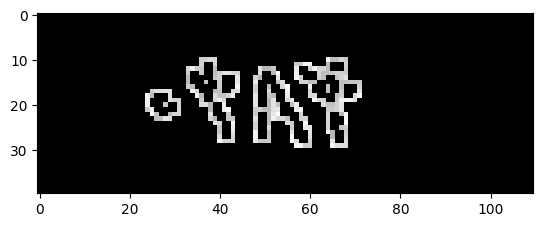

In [33]:

# Create a kernel for erosion
kernel = np.ones((2, 2), np.uint8)

# Erode the image
eroded = cv2.erode(result, kernel, iterations=1)

plt.imshow(eroded, 'gray')

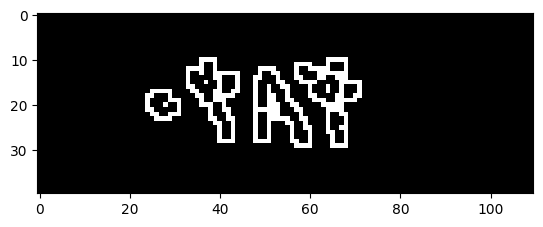

In [36]:
thresh = cv2.threshold(eroded, 170, 255,cv2.THRESH_BINARY)[1]

plt.imshow(thresh, 'gray')

In [ ]:

# Find all the white pixels
white_pixels = np.where(thresh >= 205)

# Set all the white pixels to 0
for i, j in zip(white_pixels[0], white_pixels[1]):
    result [i][j] = 0

plt.imshow(result, 'gray')

In [37]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cntlen = len( contours)
cntlen

4

In [38]:
bnot = result

In [ ]:
dict={}
cnt = 0

for i in range (cntlen) :
  x,y,w,h = cv2.boundingRect(contrs[i])
  dict[cnt] = (x,y,w,h)

  if h < 9 :
    bnot[x:x+w, y:y+h] = 0
    dict.pop(cnt)
    continue

  elif w > 90 :
    w = int(w/2)
    dict[cnt] = (x,y,w,h)
    cnt += 1

    x += w
    w *= 2
    dict[cnt] = (x,y,w,h)
    continue


  else :
    cnt += 1



len (dict)

(15, 20)

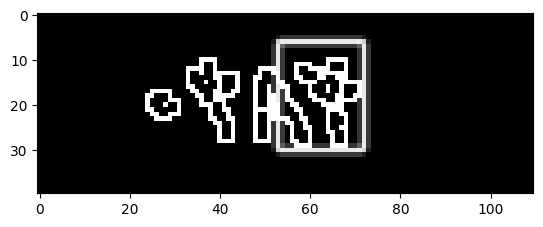

In [44]:
test = thresh

x,y,w,h = cv2.boundingRect(contours[2])

x=x-4
y=y-4
cv2.rectangle(test,(x,y),(x+w+4,y+h+4),(255,255,255),1,cv2.LINE_AA)
plt.imshow(test, 'gray')

w,h